In [1]:
import csv
import pandas as pd

In [2]:
df = pd.read_excel('raw_data.xlsx')

In [3]:
col = ['eventid', 'gname','country', 'latitude', 'longitude', 'weaptype1', 'targtype1','targsubtype1', 'attacktype1','natlty1']
#我选取的列名（10列）

In [4]:
col_filter_data = df.reindex(columns=col)
#当你在将2015年到2016年你要预测的数据处理的时候做到这步，可以直接跳到

In [5]:
col_filter_data.shape
#共有10列 11W条数据

(114183, 10)

In [6]:
active_rows = col_filter_data.index[col_filter_data['gname'] != 'Unknown']
#去除掉Unknown的行

In [7]:
col_filter_data = col_filter_data.ix[active_rows]

/home/jimmyli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [8]:
col_filter_data.shape
#去处之后还有5W数据

(54681, 10)

In [9]:
top50_terrorist = col_filter_data['gname'].value_counts()[:50]

<IPython.core.display.Javascript object>


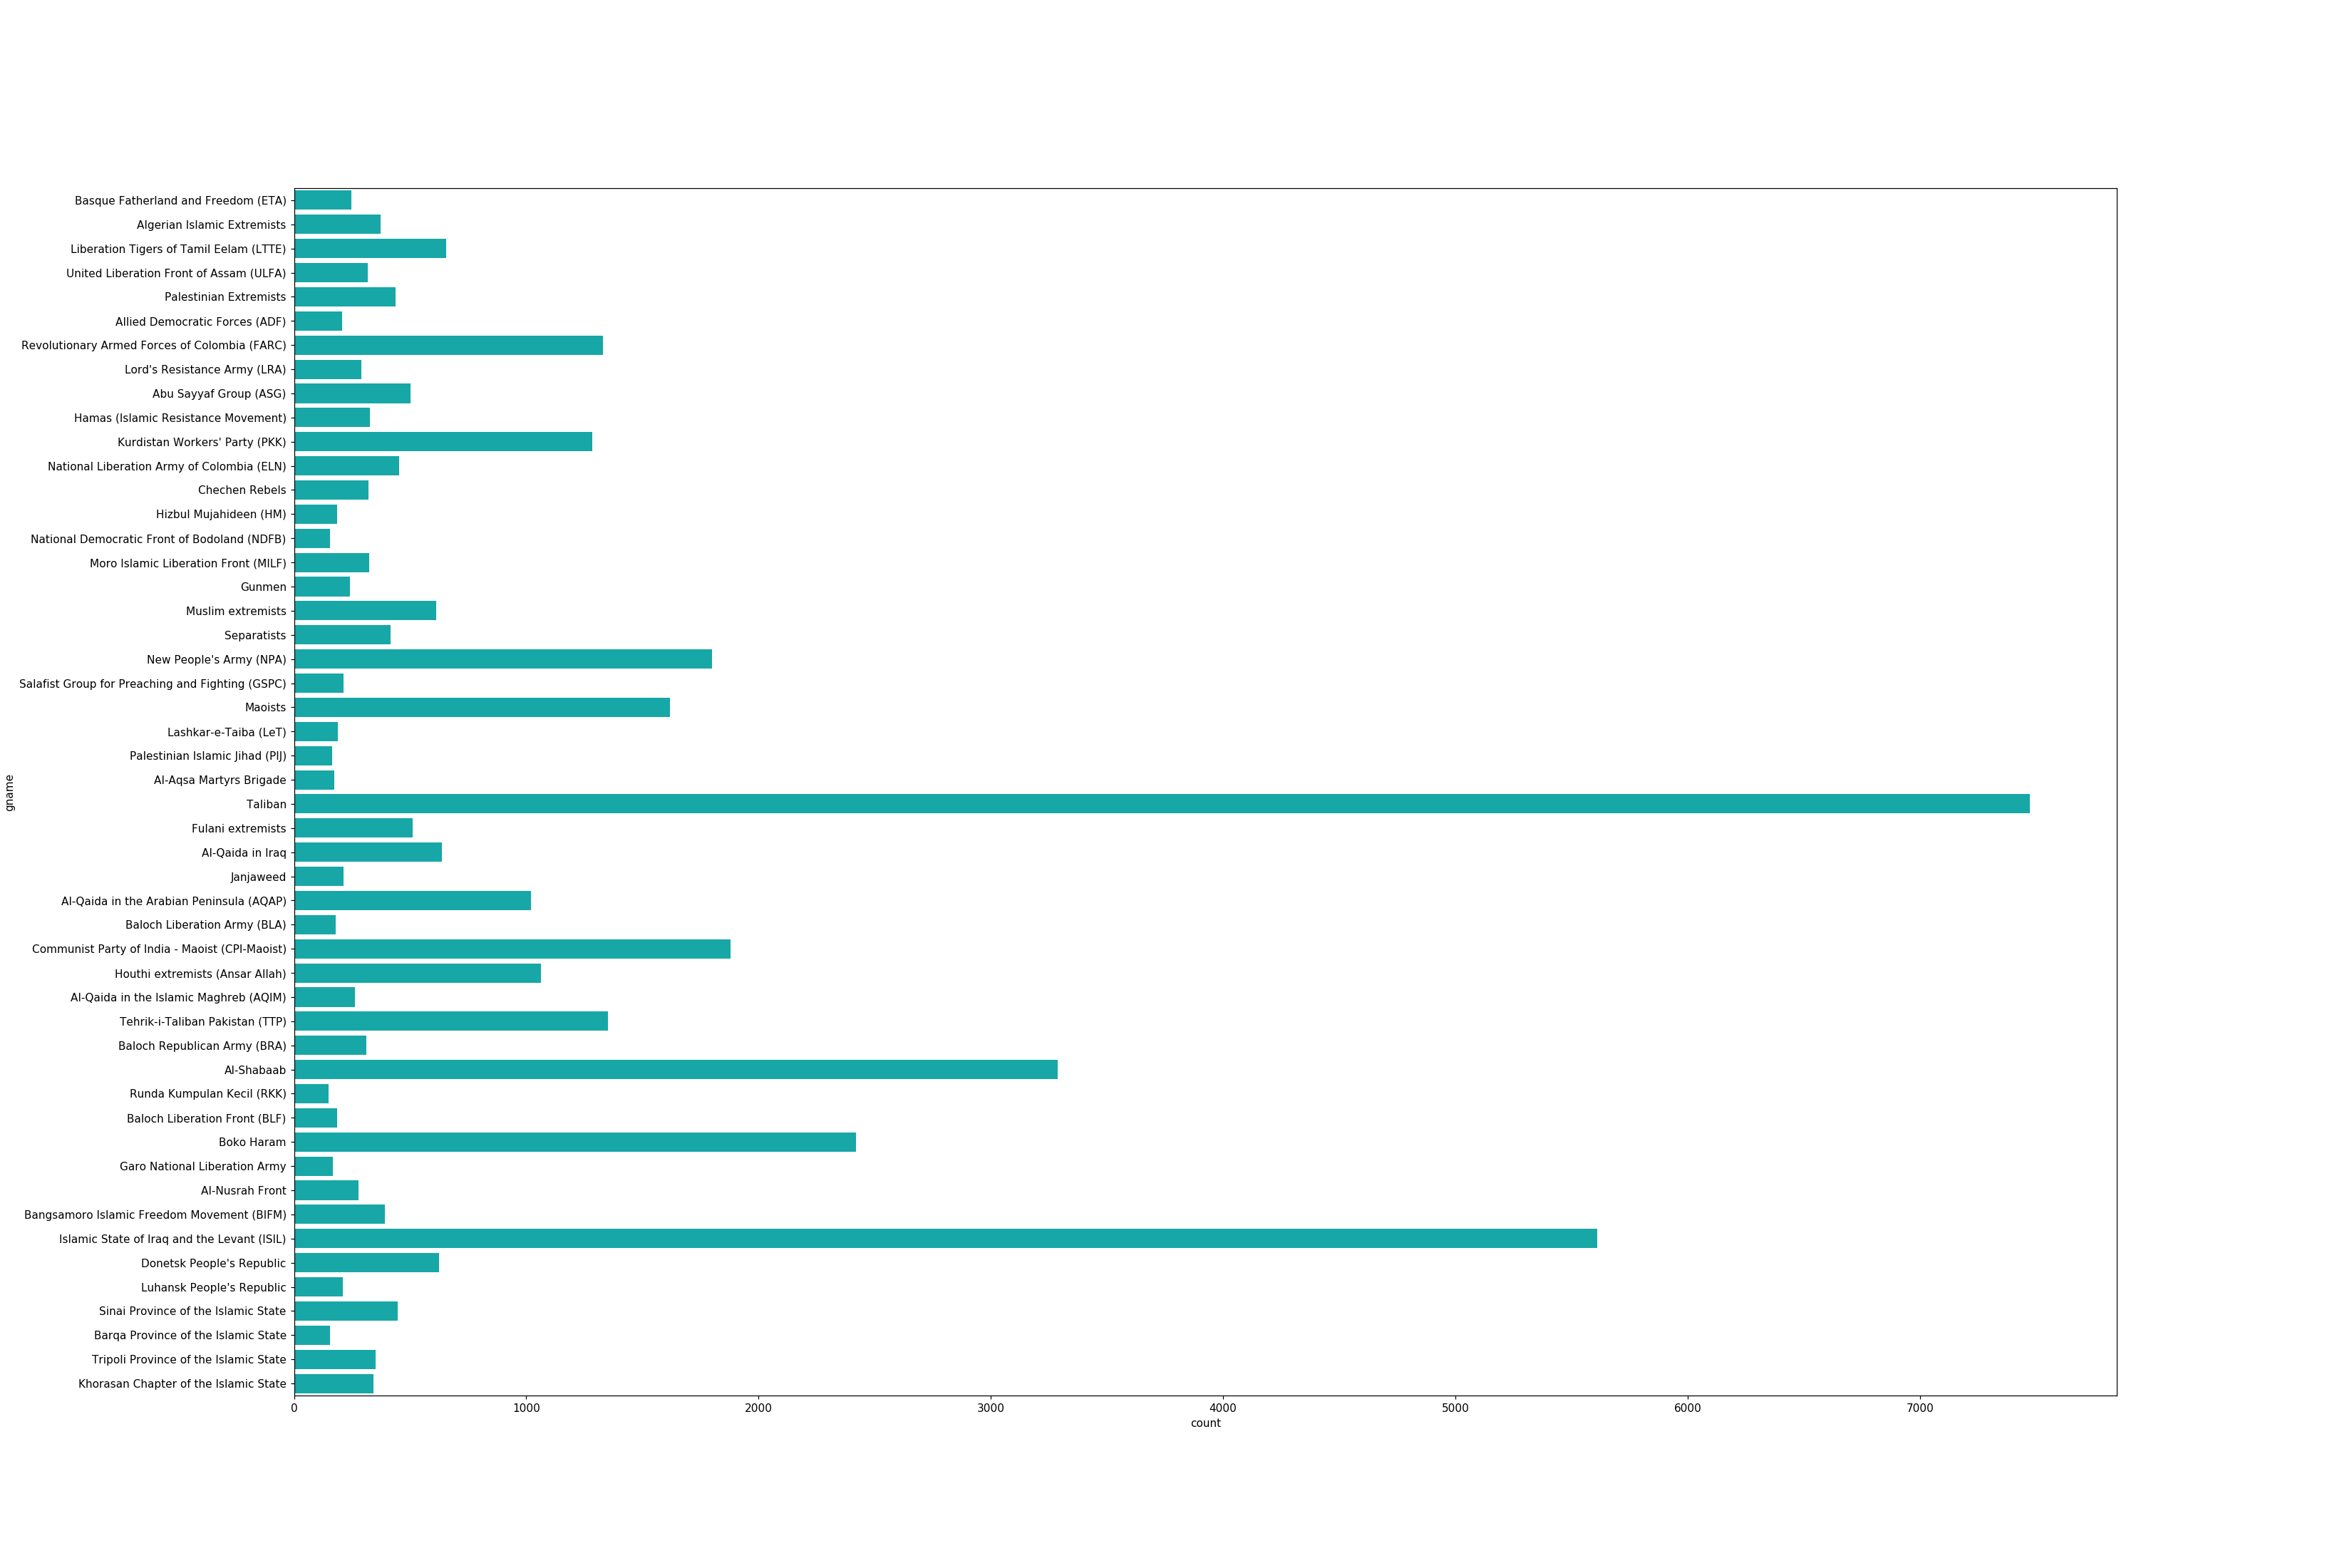

In [22]:
f, ax = plt.subplots(figsize=(30,20))

In [23]:
sns.countplot(y = top50_rows['gname'], color='c')

In [14]:
ratings_by_gname = col_filter_data.groupby('gname').size()

In [15]:
active_rows = ratings_by_gname.index[ratings_by_gname >= 150]

In [16]:
top50_rows = col_filter_data[col_filter_data['gname'].isin(active_rows)]

In [17]:
top50_rows.shape
#选取前50恐怖组织的数据共4.2W条

(42348, 10)

### 当你在将2015年到2016年你要预测的数据处理的时候从上面直接跳到这一步 ，因为你的行只有表中的那些，你已经筛选过了

In [24]:
dropna_top50 = top50_rows.dropna()
#这步是将数据中包含空值的那一行去掉（只要一行数据中有一列为空，则去掉）
#当你在将2015年到2016年你要预测的数据处理的时候这步要改一下，改成top50_rows.fillna(0)将缺失数据填补0，要不后面会报错

In [25]:
label = dropna_top50[col[1]]
#gname列作为标签，也就是分类名 y值
#当你在将2015年到2016年你要预测的数据处理的时候这步就不用做了

In [26]:
label.shape

(40287,)

In [27]:
feature = dropna_top50[col[2:]]
#后面的列作为特征，  也就是 x

In [28]:
feature.shape

(40287, 8)

In [29]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40287 entries, 18 to 114180
Data columns (total 8 columns):
country         40287 non-null int64
latitude        40287 non-null float64
longitude       40287 non-null float64
weaptype1       40287 non-null int64
targtype1       40287 non-null int64
targsubtype1    40287 non-null float64
attacktype1     40287 non-null int64
natlty1         40287 non-null float64
dtypes: float64(4), int64(4)
memory usage: 2.8 MB


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


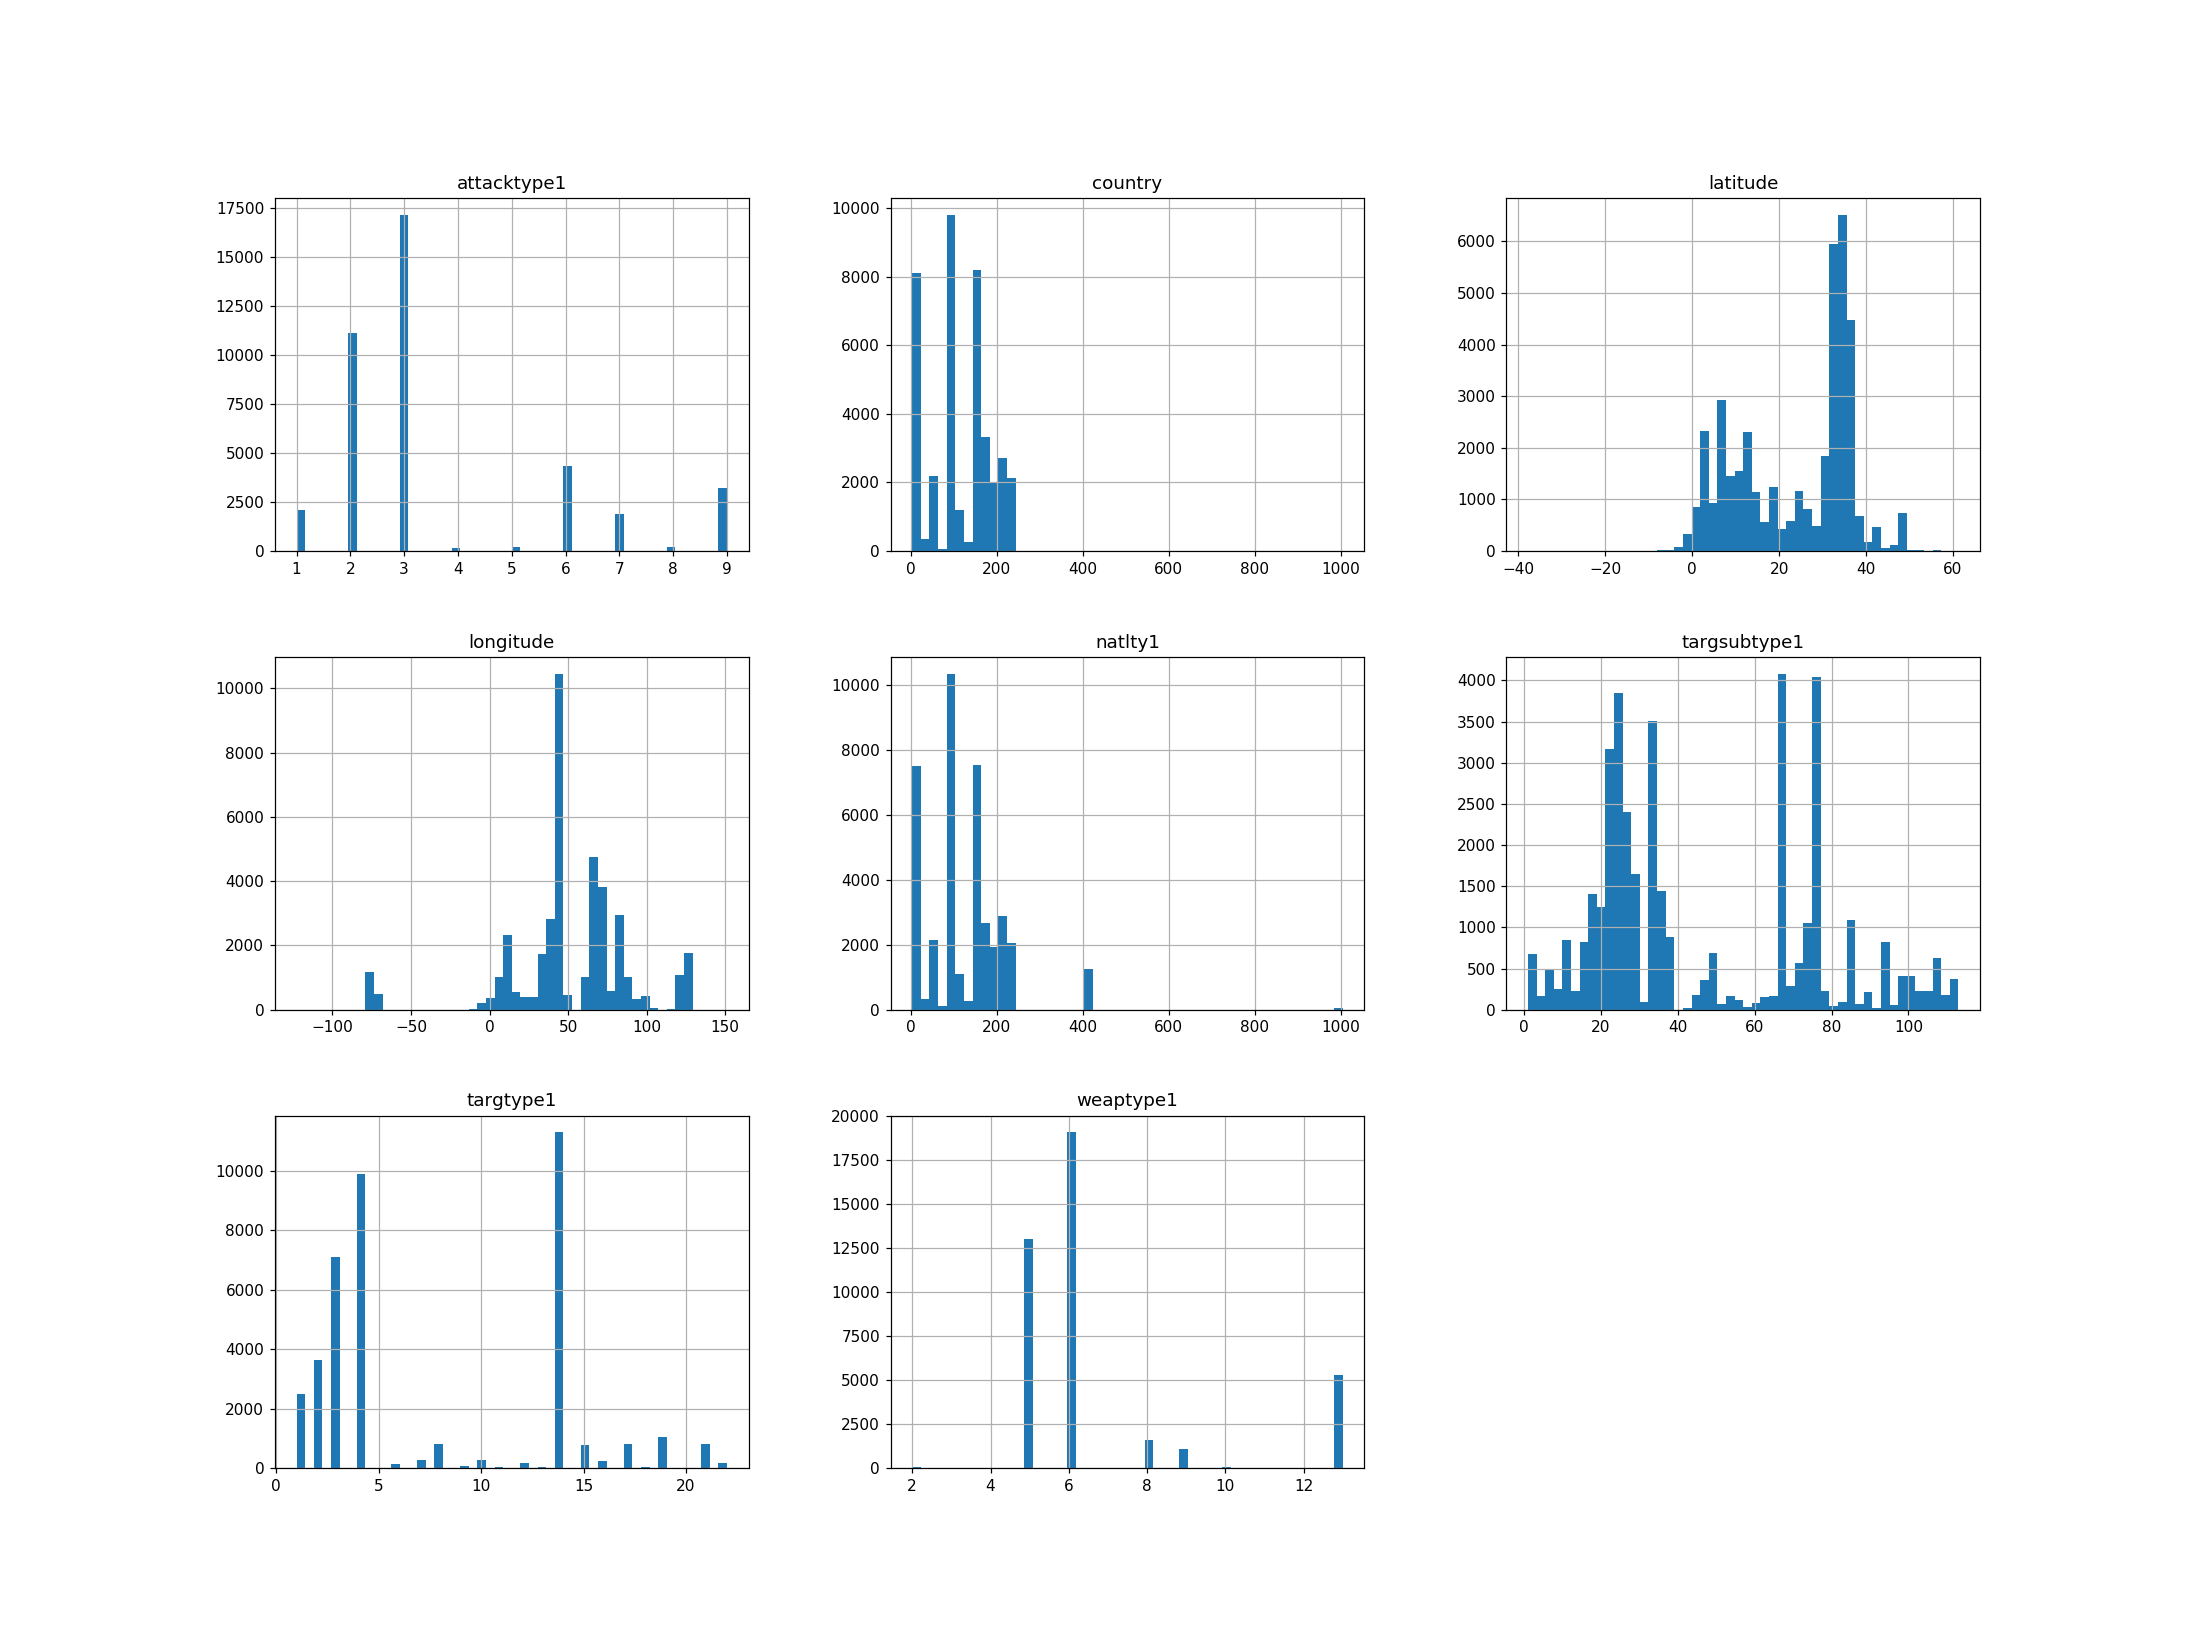

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff973e29080>,
      dtype=object)

In [33]:
feature.hist(bins=50, figsize=(20, 15)) #各个特征的数据汇总

<IPython.core.display.Javascript object>


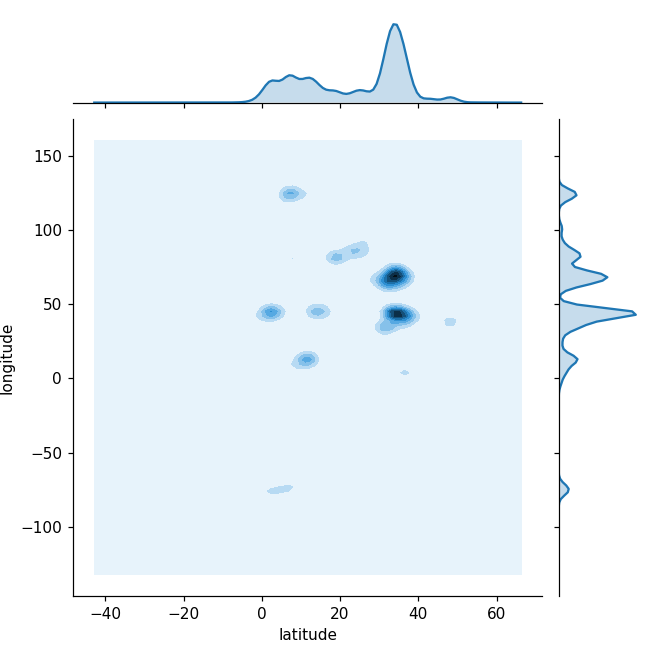

In [34]:
sns.jointplot(x = feature['latitude'], y = feature['longitude'], kind='kde') #犯罪案件经纬度的密度分布图

<IPython.core.display.Javascript object>


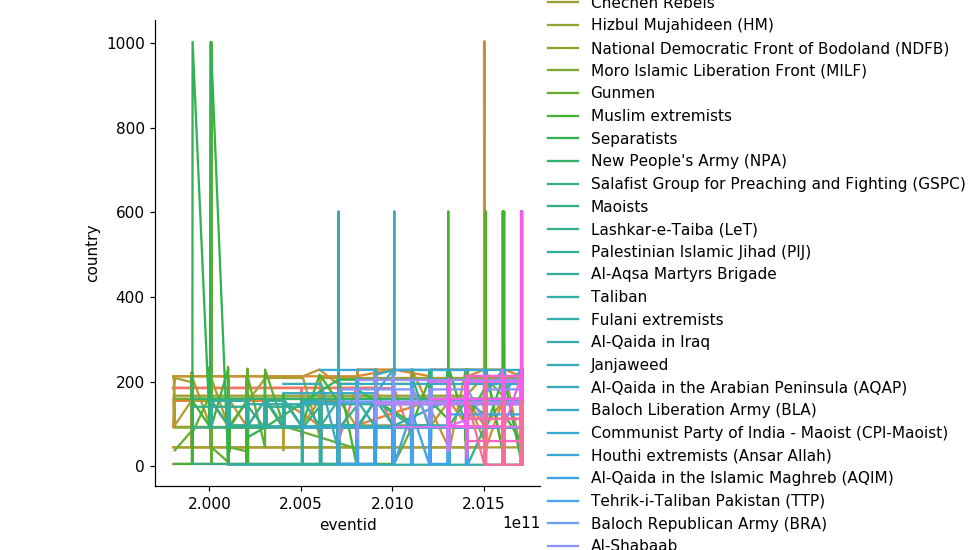

In [39]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x = 'eventid', y='country', hue = 'gname', hue_norm = LogNorm(),kind='line', data=top50_rows)

In [ ]:
top50_rows.info()

In [ ]:
from sklearn import preprocessing

#### 数据归一化 基于mean和std的标准化

In [ ]:
scaler = preprocessing.StandardScaler().fit(feature)

In [ ]:
feature_std = scaler.transform(feature)

#### 正则化

In [ ]:
feature_normalized = preprocessing.normalize(feature_std, norm='l2')

In [ ]:
feature_normalized.dtype

#### encode label

In [ ]:
encoder = preprocessing.LabelEncoder()
encode_label = encoder.fit_transform(label)
encode_label = encode_label.reshape(40287, 1)
#这步的目的是把label的值以数字形式表示，就是将各种恐怖组织给定一个数字标号进行处理，因为没法处理String

#### 数据集拆分

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_normalized, encode_label, test_size = 0.3, random_state = 42)
#X_train表示训练集的特征，y_train表示训练集的label，就相当于函数，给你x求y

#### 线性回归  失败了，可能是线性回归没办法拟合，这个效果应该也是最差的

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

lir_model = LinearRegression()

In [ ]:
lir_model.fit(X_train,y_train)

In [ ]:
y_pred = lir_model.predict(X_test)

#### 逻辑回归

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(X_train, y_train)

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

#### 支持向量机

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(C=1.0, kernel='rbf', gamma='auto', probability=True)

In [ ]:
svc_model.fit(X_train, y_train)

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test, y_pred))

### 输出可信度最高的前5个恐怖组织

In [ ]:
import numpy as np
#从现在开始是帮你解决你最后要输入到表格中的内容，就是按照预测可能排序取前5个放在表格中
predictions = svc_model.predict_proba(X_test[:5])
#这里给你举个例子，调用predict_proba方法就可以返回属于每个分类的可信度
#你做的时候就是把表格中让你填写的事件，抓取出来，然后按照上面的方式（相当于我上面写的feature那个变量所表示的内容）
#进行处理做预测 

In [ ]:
predictions  #里面每一个一维数组中的每一个数据代表属于这个类别的可信度，和为1

In [ ]:
predictions.shape  #有5个预测结果，每个结果中包含输入50个类别各自的可信度

In [ ]:
best_class_indices = np.argmax(predictions, axis=1) #调用argmax函数，可以返回可信度最高的类别的名称
best_class_indices

In [ ]:
# best_class_probabilities = predictions[np.arange(len(best_class_indices)), best_class_indices]
# best_class_probabilities
encoder.classes_[best_class_indices]    #用这种方式就可以知道上面输出的数字对应的是哪个恐怖组织

In [ ]:
encoder.classes_  #这就是一个对应

In [ ]:
prediction_prob = np.argsort(predictions, axis=1) #由于你不只要可信度最高的那一个，这里是根据可信度做一个排列（升序）
prediction_prob

In [ ]:
for i in range(len(prediction_prob)):
    print(encoder.classes_[prediction_prob[i][-5:]])             
#这样就能知道排序最高的是哪5个了，现在还是升序，你想改就自己再改吧

## 对2015-2016年度发生的，尚未有组织或个人宣称的恐怖事件进行预测

In [ ]:
col2015 = ['eventid', 'gname','iyear', 'country', 'latitude', 'longitude', 'weaptype1', 'targtype1','targsubtype1', 'attacktype1','natlty1']
#我选取的列名（10列）

In [ ]:
col_filter_data_2015 = df.reindex(columns=col2015)

In [ ]:
col_filter_data_2015.shape

In [ ]:
unknown_rows = col_filter_data_2015.index[col_filter_data_2015['gname'] == 'Unknown' ]

In [ ]:
unknown_data = col_filter_data_2015.ix[unknown_rows]

In [ ]:
unknown_rows_201516 = unknown_data.index[unknown_data['iyear'] >=2015]

In [ ]:
unknown_rows_201516 = unknown_data.ix[unknown_rows_201516]

In [ ]:
filter16 = unknown_rows_201516.index[unknown_rows_201516['iyear']<=2016]

In [ ]:
unknown_rows_201516 = unknown_rows_201516.ix[filter16]

In [ ]:
unknown_rows_201516.info()

In [ ]:
unknown_rows_201516.describe()   #2015-2016尚未有组织或个人宣称的恐怖事件

In [ ]:
unknown_rows_201516.shape

## 对恐怖事件进行预测

In [ ]:
feature_unknown = unknown_rows_201516[col2015[3:]]

In [ ]:
feature_unknown = feature_unknown.dropna()

In [ ]:
feature_unknown.info()

In [ ]:
#数据归一化
scaler_unknown = preprocessing.StandardScaler().fit(feature_unknown)
feature_unknown_std = scaler.transform(feature)

In [ ]:
#正则化
feature_normalized = preprocessing.normalize(feature_unknown_std, norm='l2')

In [ ]:
#利用SVM进行预测
unknown_prediction = svc_model.predict(X_test)

In [ ]:
unknown_prediction.dtype

In [ ]:
from collections import Counter
Counter(unknown_prediction)

#### 在2015,2016年度发生的，尚未有组织或个人宣称负责的恐怖事件中，危害性排名前5的是：
- 'Islamic State of Iraq and the Levant (ISIL)'
- 'Al-Shabaab'
- 'Maoists'
- 'Tripoli Province of the Islamic State'
- 'Taliban'

In [ ]:
rank_index = [25, 6, 33, 48, 46]
encoder.classes_[rank_index]

## 对特定事件进行可信度预测

In [ ]:
sample = [201701090031, 201702210037, 201703120023,
          201705050009, 201705050010, 201707010028,
          201707020006, 201708110018, 201711010006,
          201712010003]

In [ ]:
y = []
for i in sample:
    sample_filter = col_filter_data_2015.index[col_filter_data_2015['eventid'] == i]
    y.append(sample_filter)

In [ ]:
y

In [ ]:
filter1 = [103533, 104775,105390,106967,106968,109039,109049,110333,112632,113434]

In [ ]:
filter17_row = col_filter_data_2015.ix[filter1]

In [ ]:
filter17_row

In [ ]:
feature_17 = filter17_row[col2015[3:]]

In [ ]:
feature_17

In [ ]:
scaler_17 = preprocessing.StandardScaler().fit(feature_17)
feature_17_std = scaler.transform(feature_17)
feature_17_normalized = preprocessing.normalize(feature_17_std, norm='l2')

In [ ]:
predictions_17 = svc_model.predict_proba(feature_17_normalized)

In [ ]:
best_class_indices_17 = np.argmax(predictions_17, axis=1) #调用argmax函数，可以返回可信度最高的类别的名称
best_class_indices_17

In [ ]:
prediction_prob_17 = np.argsort(predictions_17, axis=1) #由于你不只要可信度最高的那一个，这里是根据可信度做一个排列（升序）
prediction_prob_17

### 最终结果：
- 'Islamic State of Iraq and the Levant (ISIL)'
- 'Al-Shabaab'
- 'Maoists'
- 'Tripoli Province of the Islamic State'
- 'Taliban'

In [ ]:
for i in range(len(prediction_prob_17)):
    print(encoder.classes_[prediction_prob_17[i][-5:]])   
#危险系数按升序排列